In [1]:
"""
@File    : edu_airdrop_lab.ipynb
@Create  : 2024/09/24
@Modify  : 2024/09/26 18:39:29
@Author  : Flora Sun
@Contact : floras@animocabrands.com
@Desc    : None
"""

'\n@File    : edu_airdrop_lab.ipynb\n@Create  : 2024/09/24\n@Modify  : 2024/09/26 18:39:29\n@Author  : Flora Sun\n@Contact : floras@animocabrands.com\n@Desc    : None\n'

# Import libiaries

In [263]:
import os
import numpy as np
import pandas as pd
import sybil_functions
import importlib
from datetime import datetime
from tqdm import tqdm
import requests
from time import sleep
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go
import plotly.express as px

importlib.reload(sybil_functions)

from sybil_functions import (
    read_from_multiple_csv,
    check_df,
    count_pairs,
    remove_contract_transactions,
    stretched_sigmoid,
    get_weight_df,
    plot_weight_dist,
    plot_weight_cumulative_dist,
    create_community,
    community_visualization,
    file_name_lst,
    random_rate,
    find_main_wallet,
    find_transfer_for_wallet,
    find_commu_for_wallet,
    uncommon_wallets,
)

In [3]:
os.getcwd()

'/Users/floras/Desktop/unique-user/edu/model'

In [4]:
# set the path to the focal repository
path = '/Users/floras/Desktop/unique-user'
os.chdir(path)

# Import data

## airdrop wallet

In [5]:
edu_airdrop = pd.read_json(
    "edu/data/raw_data/EDU_airdrop.json"
)
edu_airdrop = pd.DataFrame(edu_airdrop)

In [6]:
edu_airdrop_wallet = edu_airdrop["walletAddress"]

In [7]:
# to lower case
edu_airdrop_wallet = edu_airdrop_wallet.str.lower()
edu_airdrop_wallet = edu_airdrop_wallet.tolist()

## token_transfer 2023

In [8]:
token_transfer_path = r'edu/data/raw_data/edu_airdrop_wallet_token_transfers'
token_transfer_name_lst = file_name_lst(token_transfer_path, startswith="bsc")

In [9]:
token_transfer_df = read_from_multiple_csv(token_transfer_path, token_transfer_name_lst)
token_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [10]:
check_df(token_transfer_df)

(829110, 10)

token_address       object
from_address        object
to_address          object
value               object
transaction_hash    object
log_index            int64
block_timestamp     object
block_number         int64
block_hash          object
amount_raw          object
dtype: object

,log_index,block_number
count,829110.000000,8.291100e+05
mean,385.444814,2.415076e+07
std,734.724967,5.840648e+06
min,0.000000,1.396978e+07
25%,141.000000,1.869658e+07
50%,256.000000,2.524435e+07
75%,444.000000,2.875184e+07
max,55709.000000,3.484866e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
74456,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x58f876857a02d6762e0101bb5c46a8c1ed44dc16,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,8616002343588278118,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,484,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,8616002343588278118
97000,0x267022751e06d97b9ee4e5f26cc1023670bdb349,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,0x1c183b23e8d7a8d287606364f741ddbdafec28de,10615596330275200000,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,479,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,10615596330275200000
97777,0xcb2b25e783a414f0d20a65afa741c51b1ad84c49,0x3fbec4e71bfca562a1631b3870ad8d79623ca2c3,0xea9f1bd192c06f3b594062231721edbb5357806d,2608000000000000000000,0x2ecd2432c32a203aabe02526f7c13062c1eb4cc972e2...,208,2022-01-01 00:06:34+00:00,13969792,0xfa4589d9bc79aee76db839324cd4f9357e5a2815b565...,2608000000000000000000
107244,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,14109370034,0x6830c1b1e77b7a5c99bff8d07c317239284268b3f750...,170,2022-01-01 00:08:22+00:00,13969828,0x046aca96814ecd1c7fa63c61ca360cad265f033abb46...,14109370034
107242,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,500000000000,0x0667e8770dfaa72d783c0f4c6fa6ba145be0f1f04e6d...,378,2022-01-01 00:08:43+00:00,13969835,0xcc9604ce294468e5f95102dcf6c46b19dc0b48dd2f6f...,500000000000


## native token transfer 2023

In [11]:
native_token_transfer_path = r'edu/data/raw_data/edu_airdrop_wallet_native_token_transfers'
native_token_transfer_name_lst = file_name_lst(native_token_transfer_path, startswith="bsc")

In [12]:
native_token_transfer_df = read_from_multiple_csv(native_token_transfer_path, native_token_transfer_name_lst)
native_token_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [13]:
check_df(native_token_transfer_df)

(189105, 10)

token_address        object
transaction_hash     object
transaction_index     int64
block_timestamp      object
trace_id             object
from_address         object
to_address           object
amount_raw           object
call_type            object
block_number          int64
dtype: object

,transaction_index,block_number
count,189105.000000,1.891050e+05
mean,97.476079,2.540913e+07
std,138.107720,6.372803e+06
min,0.000000,1.396987e+07
25%,45.000000,1.995523e+07
50%,79.000000,2.653818e+07
75%,121.000000,3.051036e+07
max,6044.000000,3.484869e+07


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number
27725,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x135f41d360be2a3c5b8a43dc23970a4edb53f1cb75d2...,43,2022-01-01 00:10:25+00:00,call_0x135f41d360be2a3c5b8a43dc23970a4edb53f1c...,0x4cd279347bd15cca417439064ee24f5ed3391a8e,0x10ed43c718714eb63d5aa57b78b54704e256024e,6183914692940477,call,13969869
26910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x7a692e331b6174701fe663b8d39025b0aeb2561e51d5...,9,2022-01-01 00:12:13+00:00,call_0x7a692e331b6174701fe663b8d39025b0aeb2561...,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,10994100000000000000,call,13969905
24328,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1fce037731562e0f5e098c46677383f815602c8753c2...,113,2022-01-01 00:13:16+00:00,call_0x1fce037731562e0f5e098c46677383f815602c8...,0x97300791462d8acc2b7882726c2dcafe67a84e2d,0x96f5ac215089e9b9536ba58d5ce7d41ad35a0b75,64588000000000000,call,13969926
26919,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x2b1894a531984d150c873f5825539d51abef73109d70...,25,2022-01-01 00:13:37+00:00,call_0x2b1894a531984d150c873f5825539d51abef731...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969933
25910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6da9acaffa015ed865c84a2529946ee24b7641cb2857...,18,2022-01-01 00:13:52+00:00,call_0x6da9acaffa015ed865c84a2529946ee24b7641c...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969938


## EDU token transfer 2024 Jan - Sep

In [14]:
edu2024_transfer_path = r'edu/data/raw_data/edu_2024_transfers_JantoSep'
edu2024_transfer_name_lst = file_name_lst(edu2024_transfer_path, endswith="csv")

In [15]:
edu2024_transfer_df = read_from_multiple_csv(edu2024_transfer_path, edu2024_transfer_name_lst)
edu2024_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [16]:
check_df(edu2024_transfer_df)

(386911, 10)

token_address       object
from_address        object
to_address          object
value               object
transaction_hash    object
log_index           object
block_timestamp     object
block_number        object
block_hash          object
amount_raw          object
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
count,386911,386911,386911,386911,386911,386911,386911,386911,386911,386911
unique,1,10600,13620,300125,325600,3362,121248,241596,241596,298258
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x6425bc30d0751af5181fc74a50e760b0e4a19811,0x6425bc30d0751af5181fc74a50e760b0e4a19811,54370000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,0,"March 18, 2024, 5:44 PM","35,917,682",0xfc6ea849e769c02dddd3f5f58c406c443fde47c30879...,"54,370,000,000,000,000,000"
freq,386911,83485,89590,553,100,5139,253,100,100,553


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
122133,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x989a69a3e608483ae3f6fb21e2874f5c8fb98697,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,1222000000000000000000,0x529a6391b441a43147b6cc3d57c4308907e8c2bbad2c...,52,"April 1, 2024, 10:00 AM","37,475,937",0x891e0914c2c45a1979b10c7925bc1ca79797681afbf4...,"1,222,000,000,000,000,000,000"
152709,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x831310496dd05ecac3a99472151bbc2d2c2aab90,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,473000000000000000000,0x7987d18541eefeab90b26bf22664f9c9022db8db32a8...,133,"April 1, 2024, 10:00 AM","37,475,938",0x71db12ed3a480b59252b30a02c4d5037854abcbf78cd...,"473,000,000,000,000,000,000"
149118,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x0639556f03714a74a5feeaf5736a4a64ff70d206,0x4e387da922077e9106c0d963b2c0fecad9b550c1,20126800000000000000,0xe3359e578f880bf6fe35ac4b5ef8bd6bdca8f7f51b6d...,18,"April 1, 2024, 10:04 AM","37,476,027",0xf741b93574958f6a4dc39d128f146c2f8267a5a3e74e...,"20,126,800,000,000,000,000"
149283,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x9c2964cfe5b6bd093b6ca260b12924a301288cca,0x67b11fed879c37c35c4fde0be843491ddcb8d054,68593687373542923398,0x6d105a471494b73d10b5d34f982a4e54e4c8e54e599d...,447,"April 1, 2024, 10:04 AM","37,476,020",0x7b166c49785b8c3ab6630171b36265024b34b80ffffa...,"68,593,687,373,542,900,000"
122131,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x1a074554b79cc84076317941cb30c2abd0fe7993,0x9c2964cfe5b6bd093b6ca260b12924a301288cca,68593687373542923398,0x6d105a471494b73d10b5d34f982a4e54e4c8e54e599d...,443,"April 1, 2024, 10:04 AM","37,476,020",0x7b166c49785b8c3ab6630171b36265024b34b80ffffa...,"68,593,687,373,542,900,000"


## Contract list

In [17]:
## Contract list
full_contract_path = r"edu/data/processed_data"
full_contract_file = file_name_lst(full_contract_path, startswith="contract", endswith=".csv")
full_contract_df = read_from_multiple_csv(full_contract_path, full_contract_file)
full_contract_lst = full_contract_df["address"].tolist() 

# After Airdrop

## Edu 2023 Jun22 onwards data

In [18]:
edu_airdrop_2023_transfer = token_transfer_df.copy()

# select only the transactions between the airdrop wallets
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["from_address"].isin(edu_airdrop_wallet)
    | edu_airdrop_2023_transfer["to_address"].isin(edu_airdrop_wallet)
]

# only EDU token address
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["token_address"]
    == "0xbdeae1ca48894a1759a8374d63925f21f2ee2639"
]

# Generate the date column
edu_airdrop_2023_transfer["date"] = pd.to_datetime(
    edu_airdrop_2023_transfer["block_timestamp"]
).dt.date
edu_airdrop_2023_transfer["date"] = pd.to_datetime(edu_airdrop_2023_transfer["date"])

In [19]:
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["date"] >= "2023-06-22"
]

In [20]:
print(min(edu_airdrop_2023_transfer["date"]))
print(max(edu_airdrop_2023_transfer["date"]))

2023-06-22 00:00:00
2023-12-31 00:00:00


In [21]:
# check_df(edu_airdrop_2023_transfer)

## Supliment 2024 EDU data

In [22]:
edu_airdrop_2024_transfer = edu2024_transfer_df.copy()

# select only the transactions between the airdrop wallets
edu_airdrop_2024_transfer = edu_airdrop_2024_transfer[
    edu_airdrop_2024_transfer["from_address"].isin(edu_airdrop_wallet)
    | edu_airdrop_2024_transfer["to_address"].isin(edu_airdrop_wallet)
]

# Generate the date column
edu_airdrop_2024_transfer["date"] = pd.to_datetime(
    edu_airdrop_2024_transfer["block_timestamp"]
).dt.date
edu_airdrop_2024_transfer["date"] = pd.to_datetime(edu_airdrop_2024_transfer["date"])

In [23]:
# check_df(edu_airdrop_2024_transfer)

## Concatenate the two dataframes

In [24]:
edu_airdrop_transfer = pd.concat(
    [edu_airdrop_2023_transfer, edu_airdrop_2024_transfer], ignore_index=True
)

In [25]:
# remove those with same from and to address
edu_airdrop_transfer = edu_airdrop_transfer[
    edu_airdrop_transfer["from_address"] != edu_airdrop_transfer["to_address"]
]

In [26]:
# check_df(edu_airdrop_transfer)

## Remove contract addresses

### Based on API

In [27]:
# all_edu_airdrop_transfer_addresses_test = list(
#     set(edu_airdrop_transfer["from_address"].unique())
#     .union(set(edu_airdrop_transfer["to_address"].unique()))
# )
# all_edu_airdrop_transfer_addresses_test = [i.lower() for i in all_edu_airdrop_transfer_addresses_test]
# all_edu_airdrop_transfer_addresses_test = [address for address in all_edu_airdrop_transfer_addresses_test if address not in edu_airdrop_wallet]
# all_edu_airdrop_transfer_addresses_test = [address for address in all_edu_airdrop_transfer_addresses_test if address not in full_contract_lst]

# print(len(all_edu_airdrop_transfer_addresses_test))

In [28]:
# # loop through all addresses
# test_contract_lst = []

# for i in tqdm(range(len(all_edu_airdrop_transfer_addresses_test))):
#     sleep(0.15)
#     address = list(all_edu_airdrop_transfer_addresses_test)[i]
#     # oklink api
#     url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
#     headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
#     response = requests.request(method="GET", url=url, headers=headers)
#     response_json = response.json()

#     try:
#         if response_json["status"] == "1":
#             test_contract_lst.append(address)
#             print(f"Address: {address}")
#     except:
#         print(f"Error in getting info for: {address}")
#         print(response_json)
#         pass

In [29]:
# # save the file
# after_edu_contract_df = pd.DataFrame(test_contract_lst, columns=["address"])

In [30]:
edu_airdrop_transfer = remove_contract_transactions(
    edu_airdrop_transfer,
    ["from_address", "to_address"],
    full_contract_df["address"],
)

In [31]:
print(min(edu_airdrop_transfer['block_timestamp']))
print(max(edu_airdrop_transfer['block_timestamp']))

2023-06-22 01:41:21+00:00
September 9, 2024, 2:25 PM


In [32]:
check_df(edu_airdrop_transfer)

(2622, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                   object
block_timestamp             object
block_number                object
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
count,2622,2622,2622,2622,2622,2622.0,2622,2622.0,2622,2622,2622
unique,1,1719,1333,727,2600,883.0,2383,2430.0,2430,758,320
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,125000000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,5.0,2023-06-22 11:46:48+00:00,29322976.0,0xa2dd14099f19f1278d63753383a1e44b519407d4752b...,125000000000000000000,2023-06-22 00:00:00
freq,2622,281,51,996,7,13.0,13,13.0,13,883,934
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-22 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01 00:00:00


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
0,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x5c693fd2d00e0729f59924d979eac65c7576a84e,22937000000000000000,0xb71bbf689e3383b1002ae6803bfd37ee5dd97b1b0629...,3,2023-06-22 01:41:21+00:00,29310908,0xb6138487681a832a958f872e1407eae62a93635ba3ff...,22937000000000000000,2023-06-22
1,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x74e121599db43f2b11b75179aaf06f5ed6187977,2900960000000000000000,0x20b67187ba37505dde630cd5f53075fa3807f8b60c3e...,76,2023-06-22 03:36:11+00:00,29313190,0x5722d64cf65b6029b5b3cb411bdd2c32e10159f9269c...,2900960000000000000000,2023-06-22
3,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,0x13f4066005fa05dbff257af49034f0afb827aae5,215650263460000000000,0x4dbe345a73518bc52d7fd4451e9654f891f179e4e8dc...,5,2023-06-22 06:17:58+00:00,29316416,0xf78bcdef2fbcf2039340c7c1fe06f14f9d45ce96a932...,215650263460000000000,2023-06-22
5,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x1bd5371940f7d032381a2da7f7e651f4e398fdb2,0xd953bd2e2c4167417f0c14c13764c91c2d7aa5d4,505960000000000000000,0x19be2714d33d3752a614a2374c011623680375cb7346...,190,2023-06-22 08:35:00+00:00,29319154,0xb1b41a07f8897be7ce82dbba08010757995b99a0d8bd...,505960000000000000000,2023-06-22
24,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x411d41fa6be15967020a016876891b254d7f8769,0x2b5f4808a1f5444834f9da1feb914a4ecbfac49f,500000000000000000000,0x0baac8ad98b3b3e1fd6ca85bc09f41b9c05a706b5f95...,174,2023-06-22 11:01:23+00:00,29322072,0xc831f28e524c25ff20daa2074bd6e291d4329078d5a4...,500000000000000000000,2023-06-22


## Get token transaction counts

In [33]:
edu_airdrop_pair_count = pd.DataFrame(
    count_pairs(edu_airdrop_transfer, "from_address", "to_address")
)
edu_airdrop_pair_count.columns = ["edu_transfer_count"]
edu_airdrop_pair_count = get_weight_df(edu_airdrop_pair_count)
print(len(edu_airdrop_pair_count))
display(edu_airdrop_pair_count.head(10))

2063


,pair,edu_transfer_count,wallet_a,wallet_b
0,"(0x0a9fd20fc663cc9afa28699959965a2a2dc5aae3, 0...",16,0x0a9fd20fc663cc9afa28699959965a2a2dc5aae3,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
1,"(0x7646c2e54f972ea0def55b66b4f05416acd49db0, 0...",15,0x7646c2e54f972ea0def55b66b4f05416acd49db0,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
2,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",15,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xf024ca2826e9aa8a5e79b283ed7aac4802d62675
3,"(0x098d3b9d61de50bd85059969d1b302047d0ac73a, 0...",13,0x098d3b9d61de50bd85059969d1b302047d0ac73a,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
4,"(0x8942ebf98d7e0f874e61c9f8837f795625420fa8, 0...",13,0x8942ebf98d7e0f874e61c9f8837f795625420fa8,0xec9076b1ae2fde2a34f7db58ceec40d251a01f1b
5,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",13,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xe53ee538b6ad601fa384c00deac8d07fa6eef3ce
6,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",12,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xdbb9d557191501fd2cadf5a9fd80845f162d20dd
7,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",12,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xfda14453494e93ce4e69f9152490d7a1e5d18abb
8,"(0x3621f96aea9904da476727550ee205ca4c2f779c, 0...",11,0x3621f96aea9904da476727550ee205ca4c2f779c,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
9,"(0x96ce0aecdd145136bc94b3484c57ee4572064a4f, 0...",11,0x96ce0aecdd145136bc94b3484c57ee4572064a4f,0xa2ee35932171ce426351d7a3e31ee81236f23dd2


## Token transaction counts -> weight

### 1. Stretched_sigmoid

In [34]:
# Define parameters
stretch = 1
axis_end = 6

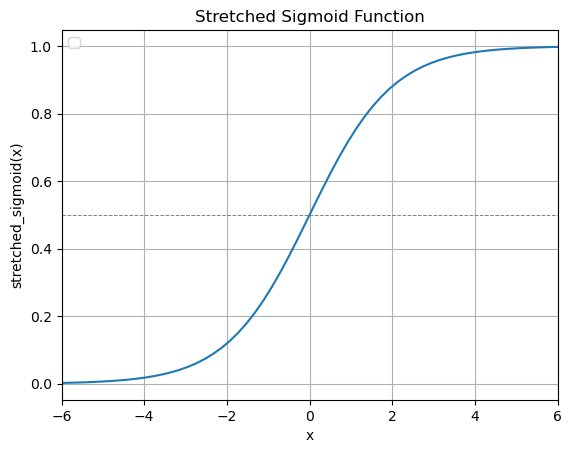

In [35]:
# Generate x values
x = np.linspace(-axis_end, axis_end, 10 * axis_end)
# Calculate y values using the sigmoid function
y = stretched_sigmoid(x, stretch)

# Plot the sigmoid function
plt.plot(x, y, label="Stretched Sigmoid Function")
plt.title("Stretched Sigmoid Function")
plt.xlabel("x")
plt.ylabel("stretched_sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.7)
plt.legend("")
plt.xlim(-axis_end, axis_end)
plt.show()

#### 1.1 - weight_df

In [36]:
# Copy the merged pair dataframe
weight_df = edu_airdrop_pair_count.copy()

# Check if wallets are in edu_airdrop_wallet
weight_df["if_wallet_a_in_edu"] = weight_df["wallet_a"].isin(edu_airdrop_wallet)
weight_df["if_wallet_b_in_edu"] = weight_df["wallet_b"].isin(edu_airdrop_wallet)

# Calculate the internal weight
weight_df["internal_weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["edu_transfer_count"], stretch) 
    if x["if_wallet_a_in_edu"] and x["if_wallet_b_in_edu"] else 0, axis=1
)

# Calculate the total weight
weight_df["weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["edu_transfer_count"], stretch) + x["internal_weight"],
    axis=1
)

# Sort based on weight
weight_df = weight_df.sort_values(by="weight", ascending=False)

In [37]:
check_df(weight_df)

(2063, 8)

pair                   object
edu_transfer_count      int64
wallet_a               object
wallet_b               object
if_wallet_a_in_edu       bool
if_wallet_b_in_edu       bool
internal_weight       float64
weight                float64
dtype: object

,edu_transfer_count,internal_weight,weight
count,2063.000000,2063.000000,2063.000000
mean,1.270965,0.042123,0.794347
std,1.206097,0.173001,0.183414
min,1.000000,0.000000,0.731059
25%,1.000000,0.000000,0.731059
50%,1.000000,0.000000,0.731059
75%,1.000000,0.000000,0.731059
max,16.000000,0.880797,1.761594


,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
122,"(0x23b30b016bf10c176a186d26770f0e475d2390dd, 0...",2,0x23b30b016bf10c176a186d26770f0e475d2390dd,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
136,"(0x6a73f55bdf562ced0d3c4b0036657e1dba263bd3, 0...",2,0x6a73f55bdf562ced0d3c4b0036657e1dba263bd3,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
121,"(0x0a678ebe4a2a0aba1f80f72618413b24f480b946, 0...",2,0x0a678ebe4a2a0aba1f80f72618413b24f480b946,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
191,"(0x7dab7f1f45aaf5d6d6fed278981b540ab1923c13, 0...",2,0x7dab7f1f45aaf5d6d6fed278981b540ab1923c13,0xe517f5274a21c74ae230d99010ad11992d0e836b,True,True,0.880797,1.761594
152,"(0x13f4066005fa05dbff257af49034f0afb827aae5, 0...",2,0x13f4066005fa05dbff257af49034f0afb827aae5,0xd90fe216865374a701bcda37198232253d76cfe5,True,True,0.880797,1.761594


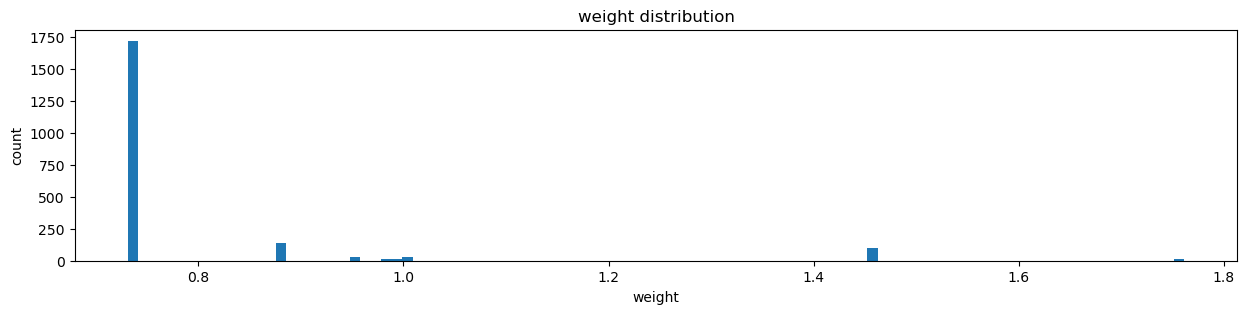

In [38]:
plot_weight_dist(weight_df)

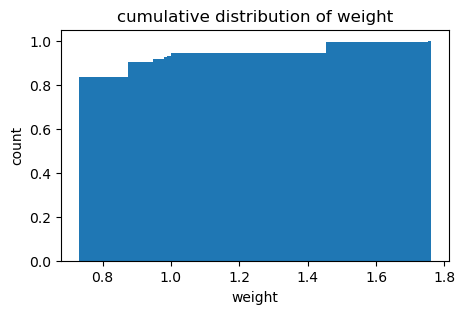

In [39]:
plot_weight_cumulative_dist(weight_df)

## weight -> community

#### build community

In [40]:
community_lst_lou_1 = create_community(weight_df, "louvain", resolution=1)
# community_lst_s_1 = create_community(weight_df, 'surprise')
# community_lst_lei_1 = create_community(weight_df, 'leiden')

Method: louvain
Number of unique wallets: 2850
Number of edges: 2063
Number of communities detected: 892
-
Average community size: 3.195067264573991
Max community size: 158
Min community size: 2



In [41]:
# row_lst = range(10)
row_lst = [1]
community_lst_visualization_1 = community_lst_lou_1

for row in row_lst:
    print("size of community:", len(community_lst_visualization_1[row]))
    print(find_main_wallet(community_lst_visualization_1[row], weight_df))
    commu_visual_df_1 = weight_df.loc[
        weight_df["wallet_a"].isin(community_lst_visualization_1[row])
        & weight_df["wallet_b"].isin(community_lst_visualization_1[row])
    ]
    # commu_visual_df_1['if_wallet_a_in_edu'] = commu_visual_df_1['wallet_a'].isin(edu_airdrop_wallet)
    # commu_visual_df_1['if_wallet_b_in_edu'] = commu_visual_df_1['wallet_b'].isin(edu_airdrop_wallet)
    print("Average weight:", commu_visual_df_1["weight"].mean())

size of community: 108
0xa2ee35932171ce426351d7a3e31ee81236f23dd2    45.0
0xe53ee538b6ad601fa384c00deac8d07fa6eef3ce    12.0
0xe37e799d5077682fa0a244d46e5649f71457bd09    11.0
0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67     7.0
0x8894e0a0c962cb723c1976a4421c95949be2d4e3     7.0
                                              ... 
0x8d045e12f52a6f03f413c004f9dc78d5939e3ffa     1.0
0x8985470a087a2c4e795bcd3f8e40de8ecb20ea7b     1.0
0x3f582340d27de86f8e565ff638f85215cf57e614     1.0
0x8942ebf98d7e0f874e61c9f8837f795625420fa8     1.0
0x85689350ab615c8d8ab61113f74ae596875ca773     1.0
Length: 122, dtype: float64
Average weight: 0.9402103723894635


In [42]:
community_visualization(commu_visual_df_1)

In [43]:
commu_visual_df_1

,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
107,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",2,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x51086d7aeb872b5e001aa7bcd761460149e2b7ef,True,True,0.880797,1.761594
92,"(0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5, 0...",2,0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5,0xca71e829398cec2de2440606420ab9157badb80b,True,True,0.880797,1.761594
1099,"(0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5, 0...",1,0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5,0x6835de77ea3f014d81bc8e853c5738f3b5644936,True,True,0.731059,1.462117
1457,"(0xb16a9e4bcca71fb3dacea2715fafc98ecc5d8f47, 0...",1,0xb16a9e4bcca71fb3dacea2715fafc98ecc5d8f47,0xca71e829398cec2de2440606420ab9157badb80b,True,True,0.731059,1.462117
849,"(0x88d8d8c2e9a29177a4a8d6755b3870e6720ee6a6, 0...",1,0x88d8d8c2e9a29177a4a8d6755b3870e6720ee6a6,0xb663d5ba61842314c6c9011102e8baddb282487d,True,True,0.731059,1.462117
...,...,...,...,...,...,...,...,...
922,"(0x0639556f03714a74a5feeaf5736a4a64ff70d206, 0...",1,0x0639556f03714a74a5feeaf5736a4a64ff70d206,0x89609d58859b4349c886931841efe352af53584d,False,True,0.000000,0.731059
878,"(0xd63ae3831720b2bcf23365a64c2e8475d176aa69, 0...",1,0xd63ae3831720b2bcf23365a64c2e8475d176aa69,0xf024ca2826e9aa8a5e79b283ed7aac4802d62675,False,True,0.000000,0.731059
821,"(0x06acc6dead0deb7e06985bbdd7f1347346a006be, 0...",1,0x06acc6dead0deb7e06985bbdd7f1347346a006be,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,True,False,0.000000,0.731059
860,"(0x098d3b9d61de50bd85059969d1b302047d0ac73a, 0...",1,0x098d3b9d61de50bd85059969d1b302047d0ac73a,0x4f391525b44af408770d0cb840bb0fa7679c3c18,True,False,0.000000,0.731059


In [44]:
test_main_wallet = '0x8894e0a0c962cb723c1976a4421c95949be2d4e3'
commu_visual_df_1[
    (commu_visual_df_1["wallet_a"] != test_main_wallet)
    & (commu_visual_df_1["wallet_b"] != test_main_wallet)
]

,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
107,"(0x2f719992b25c9405748f628e7b99ca7934ac7fb1, 0...",2,0x2f719992b25c9405748f628e7b99ca7934ac7fb1,0x51086d7aeb872b5e001aa7bcd761460149e2b7ef,True,True,0.880797,1.761594
92,"(0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5, 0...",2,0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5,0xca71e829398cec2de2440606420ab9157badb80b,True,True,0.880797,1.761594
1099,"(0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5, 0...",1,0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5,0x6835de77ea3f014d81bc8e853c5738f3b5644936,True,True,0.731059,1.462117
1457,"(0xb16a9e4bcca71fb3dacea2715fafc98ecc5d8f47, 0...",1,0xb16a9e4bcca71fb3dacea2715fafc98ecc5d8f47,0xca71e829398cec2de2440606420ab9157badb80b,True,True,0.731059,1.462117
849,"(0x88d8d8c2e9a29177a4a8d6755b3870e6720ee6a6, 0...",1,0x88d8d8c2e9a29177a4a8d6755b3870e6720ee6a6,0xb663d5ba61842314c6c9011102e8baddb282487d,True,True,0.731059,1.462117
...,...,...,...,...,...,...,...,...
922,"(0x0639556f03714a74a5feeaf5736a4a64ff70d206, 0...",1,0x0639556f03714a74a5feeaf5736a4a64ff70d206,0x89609d58859b4349c886931841efe352af53584d,False,True,0.000000,0.731059
878,"(0xd63ae3831720b2bcf23365a64c2e8475d176aa69, 0...",1,0xd63ae3831720b2bcf23365a64c2e8475d176aa69,0xf024ca2826e9aa8a5e79b283ed7aac4802d62675,False,True,0.000000,0.731059
821,"(0x06acc6dead0deb7e06985bbdd7f1347346a006be, 0...",1,0x06acc6dead0deb7e06985bbdd7f1347346a006be,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,True,False,0.000000,0.731059
860,"(0x098d3b9d61de50bd85059969d1b302047d0ac73a, 0...",1,0x098d3b9d61de50bd85059969d1b302047d0ac73a,0x4f391525b44af408770d0cb840bb0fa7679c3c18,True,False,0.000000,0.731059


# Before Airdrop

## Before Airdrop - native token

In [45]:
before_bsc_native_transfers = native_token_transfer_df.copy()

# select only the transactions between the airdrop wallets
before_bsc_native_transfers = before_bsc_native_transfers[
    before_bsc_native_transfers["from_address"].isin(edu_airdrop_wallet)
    | before_bsc_native_transfers["to_address"].isin(edu_airdrop_wallet)
]

# Generate the date column
before_bsc_native_transfers["date"] = pd.to_datetime(
    before_bsc_native_transfers["block_timestamp"]
).dt.date
before_bsc_native_transfers["date"] = pd.to_datetime(before_bsc_native_transfers["date"])

# Filter the transactions based on date
before_bsc_native_transfers = before_bsc_native_transfers[
    (before_bsc_native_transfers["date"] <= "2023-06-21")
    # & (before_bsc_native_transfers["date"] >= "2023-01-01")
]

# Sort the transactions by date
before_bsc_native_transfers.sort_values(by="block_timestamp", inplace=True)

In [46]:
check_df(before_bsc_native_transfers)

(127296, 11)

token_address                object
transaction_hash             object
transaction_index             int64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
dtype: object

,transaction_index,block_number
count,127296.000000,1.272960e+05
mean,93.267966,2.197399e+07
std,84.121588,4.720817e+06
min,0.000000,1.396987e+07
25%,42.000000,1.756625e+07
50%,78.000000,2.212426e+07
75%,122.000000,2.654216e+07
max,3133.000000,2.930868e+07


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date
27725,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x135f41d360be2a3c5b8a43dc23970a4edb53f1cb75d2...,43,2022-01-01 00:10:25+00:00,call_0x135f41d360be2a3c5b8a43dc23970a4edb53f1c...,0x4cd279347bd15cca417439064ee24f5ed3391a8e,0x10ed43c718714eb63d5aa57b78b54704e256024e,6183914692940477,call,13969869,2022-01-01
26910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x7a692e331b6174701fe663b8d39025b0aeb2561e51d5...,9,2022-01-01 00:12:13+00:00,call_0x7a692e331b6174701fe663b8d39025b0aeb2561...,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,10994100000000000000,call,13969905,2022-01-01
24328,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1fce037731562e0f5e098c46677383f815602c8753c2...,113,2022-01-01 00:13:16+00:00,call_0x1fce037731562e0f5e098c46677383f815602c8...,0x97300791462d8acc2b7882726c2dcafe67a84e2d,0x96f5ac215089e9b9536ba58d5ce7d41ad35a0b75,64588000000000000,call,13969926,2022-01-01
26919,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x2b1894a531984d150c873f5825539d51abef73109d70...,25,2022-01-01 00:13:37+00:00,call_0x2b1894a531984d150c873f5825539d51abef731...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969933,2022-01-01
25910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6da9acaffa015ed865c84a2529946ee24b7641cb2857...,18,2022-01-01 00:13:52+00:00,call_0x6da9acaffa015ed865c84a2529946ee24b7641c...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969938,2022-01-01


## Before Airdrop - other token

In [47]:
before_token_transfer = token_transfer_df.copy()

# select only the transactions between the airdrop wallets
before_token_transfer = before_token_transfer[
    before_token_transfer["from_address"].isin(edu_airdrop_wallet)
    | before_token_transfer["to_address"].isin(edu_airdrop_wallet)
]

# exclude EDU token address
before_token_transfer = before_token_transfer[
    before_token_transfer["token_address"]
    != "0xbdeae1ca48894a1759a8374d63925f21f2ee2639"
]

# Generate the date column
before_token_transfer["date"] = pd.to_datetime(
    before_token_transfer["block_timestamp"]
).dt.date
before_token_transfer["date"] = pd.to_datetime(before_token_transfer["date"])

# Filter the transactions based on date
before_token_transfer = before_token_transfer[
    (before_token_transfer["date"] <= "2023-06-21")
    # & (before_token_transfer["date"] >= "2023-01-01")
]

# Sort the transactions by date
before_token_transfer.sort_values(by="block_timestamp", inplace=True)

In [48]:
check_df(before_token_transfer)

(647498, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                    int64
block_timestamp             object
block_number                 int64
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,log_index,block_number
count,647498.000000,6.474980e+05
mean,382.578978,2.208283e+07
std,599.630744,4.816559e+06
min,0.000000,1.396978e+07
25%,142.000000,1.730584e+07
50%,261.000000,2.270139e+07
75%,453.000000,2.656556e+07
max,55709.000000,2.930888e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
74456,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x58f876857a02d6762e0101bb5c46a8c1ed44dc16,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,8616002343588278118,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,484,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,8616002343588278118,2022-01-01
97000,0x267022751e06d97b9ee4e5f26cc1023670bdb349,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,0x1c183b23e8d7a8d287606364f741ddbdafec28de,10615596330275200000,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,479,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,10615596330275200000,2022-01-01
97777,0xcb2b25e783a414f0d20a65afa741c51b1ad84c49,0x3fbec4e71bfca562a1631b3870ad8d79623ca2c3,0xea9f1bd192c06f3b594062231721edbb5357806d,2608000000000000000000,0x2ecd2432c32a203aabe02526f7c13062c1eb4cc972e2...,208,2022-01-01 00:06:34+00:00,13969792,0xfa4589d9bc79aee76db839324cd4f9357e5a2815b565...,2608000000000000000000,2022-01-01
107244,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,14109370034,0x6830c1b1e77b7a5c99bff8d07c317239284268b3f750...,170,2022-01-01 00:08:22+00:00,13969828,0x046aca96814ecd1c7fa63c61ca360cad265f033abb46...,14109370034,2022-01-01
107242,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,500000000000,0x0667e8770dfaa72d783c0f4c6fa6ba145be0f1f04e6d...,378,2022-01-01 00:08:43+00:00,13969835,0xcc9604ce294468e5f95102dcf6c46b19dc0b48dd2f6f...,500000000000,2022-01-01


## Concate before_bsc_native_transfers and before_token_transfer

In [49]:
before_bsc_transfers = pd.concat(
    [before_bsc_native_transfers, before_token_transfer], ignore_index=True
)

In [50]:
# remove transactions with same from and to address
before_bsc_transfers = before_bsc_transfers[
    before_bsc_transfers["from_address"] != before_bsc_transfers["to_address"]
]

In [51]:
check_df(before_bsc_transfers)

(774466, 14)

token_address                object
transaction_hash             object
transaction_index           float64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
value                        object
log_index                   float64
block_hash                   object
dtype: object

,transaction_index,block_number,log_index
count,127241.000000,7.744660e+05,647225.000000
mean,93.270204,2.206463e+07,382.637743
std,84.131987,4.801615e+06,599.728038
min,0.000000,1.396978e+07,0.000000
25%,42.000000,1.734659e+07,142.000000
50%,78.000000,2.256195e+07,261.000000
75%,122.000000,2.656115e+07,453.000000
max,3133.000000,2.930888e+07,55709.000000


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date,value,log_index,block_hash
0,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x135f41d360be2a3c5b8a43dc23970a4edb53f1cb75d2...,43.0,2022-01-01 00:10:25+00:00,call_0x135f41d360be2a3c5b8a43dc23970a4edb53f1c...,0x4cd279347bd15cca417439064ee24f5ed3391a8e,0x10ed43c718714eb63d5aa57b78b54704e256024e,6183914692940477,call,13969869,2022-01-01,NaN,NaN,NaN
1,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x7a692e331b6174701fe663b8d39025b0aeb2561e51d5...,9.0,2022-01-01 00:12:13+00:00,call_0x7a692e331b6174701fe663b8d39025b0aeb2561...,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,10994100000000000000,call,13969905,2022-01-01,NaN,NaN,NaN
2,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1fce037731562e0f5e098c46677383f815602c8753c2...,113.0,2022-01-01 00:13:16+00:00,call_0x1fce037731562e0f5e098c46677383f815602c8...,0x97300791462d8acc2b7882726c2dcafe67a84e2d,0x96f5ac215089e9b9536ba58d5ce7d41ad35a0b75,64588000000000000,call,13969926,2022-01-01,NaN,NaN,NaN
3,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x2b1894a531984d150c873f5825539d51abef73109d70...,25.0,2022-01-01 00:13:37+00:00,call_0x2b1894a531984d150c873f5825539d51abef731...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969933,2022-01-01,NaN,NaN,NaN
4,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6da9acaffa015ed865c84a2529946ee24b7641cb2857...,18.0,2022-01-01 00:13:52+00:00,call_0x6da9acaffa015ed865c84a2529946ee24b7641c...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969938,2022-01-01,NaN,NaN,NaN


## Remove contract transactions

In [52]:
all_before_bsc_transfer_addresses = list(
    set(before_bsc_transfers["from_address"].unique()).union(
        set(before_bsc_transfers["to_address"].unique())
    )
)
all_before_bsc_transfer_addresses = [x for x in all_before_bsc_transfer_addresses if x not in edu_airdrop_wallet]
print(len(all_before_bsc_transfer_addresses))

79062


In [53]:
# # loop through all addresses
# contract_lst = []

# for i in tqdm(range(62067, len(all_before_bsc_transfer_addresses))):
#     sleep(0.15)
#     address = list(all_before_bsc_transfer_addresses)[i]
#     # oklink api
#     url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
#     headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
#     response = requests.request(method="GET", url=url, headers=headers)
#     response_json = response.json()

#     try:
#         if response_json["status"] == "1":
#             contract_lst.append(address)
#             # print(f"Address: {address}")
#     except:
#         print(f"Error in getting info for: {address}")
#         print(response_json)
#         pass

In [54]:
# # save the file
# before_bnb_contract_df = pd.DataFrame(contract_lst, columns=["address"])
# before_bnb_contract_df.to_csv(
#     r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/before_bnb_contract.csv",
#     index=False,
# )·

In [55]:
before_bsc_transfers = remove_contract_transactions(
    before_bsc_transfers,
    ["from_address", "to_address"],
    full_contract_lst,
)

In [56]:
print(min(before_bsc_transfers['block_timestamp']))
print(max(before_bsc_transfers['block_timestamp']))

2022-01-01 00:05:52+00:00
2023-06-21 23:49:54+00:00


In [57]:
check_df(before_bsc_transfers)

(462030, 14)

token_address                object
transaction_hash             object
transaction_index           float64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
value                        object
log_index                   float64
block_hash                   object
dtype: object

,transaction_index,block_number,log_index
count,78194.000000,4.620300e+05,383836.000000
mean,91.124575,2.113551e+07,424.151255
std,87.733310,4.841992e+06,719.386832
min,0.000000,1.396978e+07,0.000000
25%,39.000000,1.655940e+07,144.000000
50%,76.000000,2.088224e+07,284.000000
75%,119.000000,2.596245e+07,501.000000
max,3133.000000,2.930868e+07,55709.000000


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date,value,log_index,block_hash
1,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x7a692e331b6174701fe663b8d39025b0aeb2561e51d5...,9.0,2022-01-01 00:12:13+00:00,call_0x7a692e331b6174701fe663b8d39025b0aeb2561...,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,10994100000000000000,call,13969905,2022-01-01,NaN,NaN,NaN
2,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1fce037731562e0f5e098c46677383f815602c8753c2...,113.0,2022-01-01 00:13:16+00:00,call_0x1fce037731562e0f5e098c46677383f815602c8...,0x97300791462d8acc2b7882726c2dcafe67a84e2d,0x96f5ac215089e9b9536ba58d5ce7d41ad35a0b75,64588000000000000,call,13969926,2022-01-01,NaN,NaN,NaN
14,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x79f7b3cf9842de94b3a400d14ea5ab8434c4a7fe1472...,164.0,2022-01-01 00:23:31+00:00,call_0x79f7b3cf9842de94b3a400d14ea5ab8434c4a7f...,0xf100022d0812a8cee4382511f53691601c3ce91b,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,200000000000000000,call,13970131,2022-01-01,NaN,NaN,NaN
17,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x09b422a8c1ee423dea7b015e89fb1774689683498caa...,138.0,2022-01-01 00:40:40+00:00,call_0x09b422a8c1ee423dea7b015e89fb17746896834...,0xf100022d0812a8cee4382511f53691601c3ce91b,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,200000000000000000,call,13970474,2022-01-01,NaN,NaN,NaN
21,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x07d336048c7f07313045aae797c1676eac91086c28e2...,19.0,2022-01-01 00:49:58+00:00,call_0x07d336048c7f07313045aae797c1676eac91086...,0x01c952174c24e1210d26961d456a77a39e1f0bb0,0x00cdebc042c87c95e439e1aefa0bd3a8014da577,61736840000000000,call,13970660,2022-01-01,NaN,NaN,NaN


## Get before transaction counts

In [58]:
before_bsc_pair_count = pd.DataFrame(
    count_pairs(before_bsc_transfers, "from_address", "to_address")
)
before_bsc_pair_count.columns = ["before_bsc_transfer_count"]
before_bsc_pair_count = get_weight_df(before_bsc_pair_count)

before_bsc_pair_count["if_wallet_a_in_edu"] = before_bsc_pair_count["wallet_a"].isin(
    edu_airdrop_wallet
)
before_bsc_pair_count["if_wallet_b_in_edu"] = before_bsc_pair_count["wallet_b"].isin(
    edu_airdrop_wallet
)


print(len(before_bsc_pair_count))
display(before_bsc_pair_count[before_bsc_pair_count["before_bsc_transfer_count"] == 40])

156005


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu
983,"(0xc6eaacaa6de1b7c98ff558da46e0bbd62a333885, 0...",40,0xc6eaacaa6de1b7c98ff558da46e0bbd62a333885,0xdc8dbca78a5da4f29ca4572dc4734c0048d61c2f,True,False
984,"(0x09fe9db65c44b9610ab7dcd6853f887d2ade7e7f, 0...",40,0x09fe9db65c44b9610ab7dcd6853f887d2ade7e7f,0x1a19153b0a64b48f2961bf90f058279b72929d74,False,True
985,"(0x922779aae2cc05773b4810fe6ba70e4769d7f51b, 0...",40,0x922779aae2cc05773b4810fe6ba70e4769d7f51b,0xf03186a1fd2b42046768dcdb5aa30604a97747d5,False,True
986,"(0x8bfbaa24c27c6309a95e0aa22801bc1d61a52558, 0...",40,0x8bfbaa24c27c6309a95e0aa22801bc1d61a52558,0xe4edb277e41dc89ab076a1f049f4a3efa700bce8,True,False
987,"(0x674092069ac4f1e6ec911af630eb3ca05dfd08f9, 0...",40,0x674092069ac4f1e6ec911af630eb3ca05dfd08f9,0xf48bd1c60d595c9c6b7a9f8954d90624fc519a40,True,False
988,"(0x4ce63f021e592f292c3593fea75690ffa2ab10c5, 0...",40,0x4ce63f021e592f292c3593fea75690ffa2ab10c5,0xa405655a86ae9d7fd9446347c0e029dde0642daa,False,True
989,"(0x79bdda65c706cbda69c0ad4c8da1d3e91724f48d, 0...",40,0x79bdda65c706cbda69c0ad4c8da1d3e91724f48d,0xf90f9e5beab193918217789b25093f5d6470b931,True,False
990,"(0x4ac5188c72c3a705d7daad03bdeaf8721a1fd30a, 0...",40,0x4ac5188c72c3a705d7daad03bdeaf8721a1fd30a,0x4d43a6b1bb4947159ceb4a8d78e6484f58e1d80c,False,True
991,"(0xc32422d2977aba6f222f714ae20de87f3398c053, 0...",40,0xc32422d2977aba6f222f714ae20de87f3398c053,0xff1e1650a13000e7524e16629db05e4d6b83a092,True,False
992,"(0x0809c095cb06de8a5c0275b41cfbd619bf4e3f45, 0...",40,0x0809c095cb06de8a5c0275b41cfbd619bf4e3f45,0xca3028383f5e0254f4bc784388a34664bf365dab,True,False


## Token transaction counts -> weight

### 1. Stretched_sigmoid

In [59]:
# Define parameters
stretch = 1
axis_end = 15

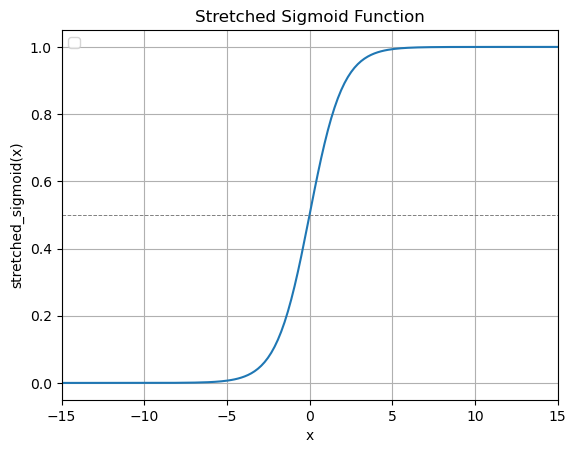

In [60]:
# Generate x values
x = np.linspace(-axis_end, axis_end, 10 * axis_end)
# Calculate y values using the sigmoid function
y = stretched_sigmoid(x, stretch)

# Plot the sigmoid function
plt.plot(x, y, label="Stretched Sigmoid Function")
plt.title("Stretched Sigmoid Function")
plt.xlabel("x")
plt.ylabel("stretched_sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.7)
plt.legend("")
plt.xlim(-axis_end, axis_end)
plt.show()

#### 1.1 - before_weight_df

In [61]:
# Copy the merged pair dataframe
before_weight_df = before_bsc_pair_count.copy()

# Calculate the internal weight
before_weight_df["internal_weight"] = before_weight_df.apply(
    lambda x: stretched_sigmoid(x["before_bsc_transfer_count"], stretch) 
    if x["if_wallet_a_in_edu"] and x["if_wallet_b_in_edu"] else 0, axis=1
)

# Calculate the weight between the two wallets
before_weight_df["weight"] = before_weight_df.apply(
    lambda x: stretched_sigmoid(x["before_bsc_transfer_count"], stretch) + x["internal_weight"],
    axis=1
)

# sort based on weight
before_weight_df = before_weight_df.sort_values(by="weight", ascending=False)

In [62]:
check_df(before_weight_df)

(156005, 8)

pair                          object
before_bsc_transfer_count      int64
wallet_a                      object
wallet_b                      object
if_wallet_a_in_edu              bool
if_wallet_b_in_edu              bool
internal_weight              float64
weight                       float64
dtype: object

,before_bsc_transfer_count,internal_weight,weight
count,156005.000000,156005.000000,156005.000000
mean,2.961636,0.004033,0.808293
std,15.227188,0.058731,0.120885
min,1.000000,0.000000,0.731059
25%,1.000000,0.000000,0.731059
50%,1.000000,0.000000,0.731059
75%,2.000000,0.000000,0.880797
max,2401.000000,1.000000,2.000000


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
137,"(0x1dff51738c8c7d57c68e756ab257178184264015, 0...",151,0x1dff51738c8c7d57c68e756ab257178184264015,0xf4231d8230d04ff75becf1a53364d45f898a6d24,True,True,1.0,2.0
717,"(0x3a21f203aa82f4e0f983ae42a2190ce9a9f18b7f, 0...",49,0x3a21f203aa82f4e0f983ae42a2190ce9a9f18b7f,0xd6e94b499446f284bbfbe831a128fac35ab347ae,True,True,1.0,2.0
227,"(0x597a3beac9e112a21e20cdc1b255ffd9f6b21994, 0...",102,0x597a3beac9e112a21e20cdc1b255ffd9f6b21994,0x8e99ef09f2d5b709f302edc3e5a9773a78667d48,True,True,1.0,2.0
895,"(0x77f04ad8a9ec8438b5a5f27436eb844d94aed61e, 0...",43,0x77f04ad8a9ec8438b5a5f27436eb844d94aed61e,0xff9f20367488f3386a97bc3897798b0e8bd1b2da,True,True,1.0,2.0
326,"(0x01291849cc904161603c1c60ff86658ad7eadb8d, 0...",81,0x01291849cc904161603c1c60ff86658ad7eadb8d,0x1568f9187f1b3831b0e34e5f39fb0fa7f8d10996,True,True,1.0,2.0


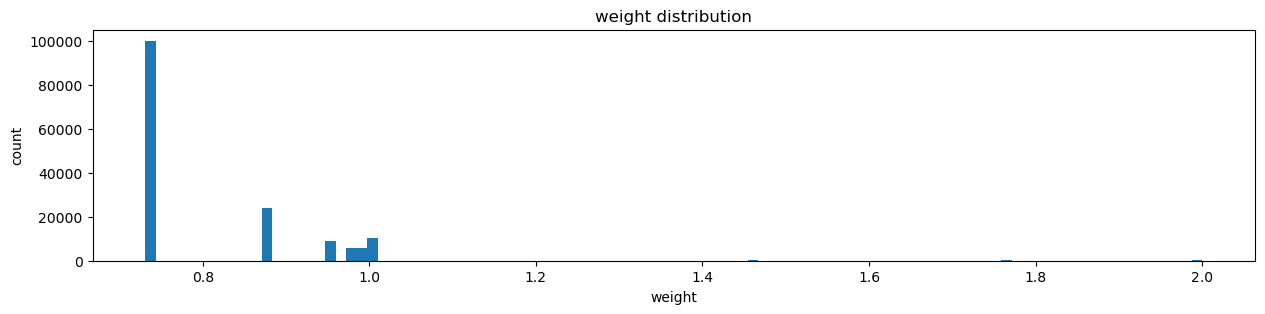

In [63]:
plot_weight_dist(before_weight_df)

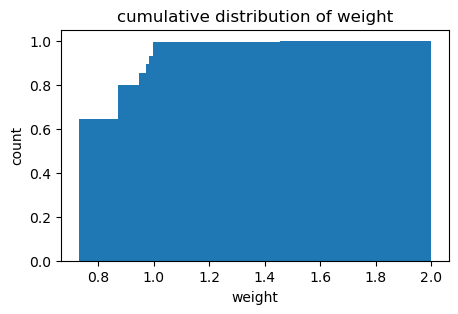

In [64]:
plot_weight_cumulative_dist(before_weight_df)

## weight -> community

#### build community

In [65]:
before_community_lst_lou_1 = create_community(before_weight_df, "louvain", resolution = 1)
# before_community_lst_s_1 = create_community(before_weight_df, 'surprise')
# before_community_lst_lei_1 = create_community(before_weight_df, 'leiden')

Method: louvain
Number of unique wallets: 81243
Number of edges: 156005
Number of communities detected: 165
-
Average community size: 492.3818181818182
Max community size: 8990
Min community size: 2



In [104]:
before_row_lst = range(5)
before_row_lst = [36]

before_community_lst_visualization_1 = before_community_lst_lou_1

for row in before_row_lst:
    print("size of community:", len(before_community_lst_visualization_1[row]))
    print(before_community_lst_visualization_1[row])
    before_commu_visual_df_1 = before_weight_df.loc[
        before_weight_df["wallet_a"].isin(before_community_lst_visualization_1[row])
        | before_weight_df["wallet_b"].isin(before_community_lst_visualization_1[row])
        
    ]
    # before_commu_visual_df_1['if_wallet_a_in_edu'] = before_commu_visual_df_1['wallet_a'].isin(edu_airdrop_wallet)
    # before_commu_visual_df_1['if_wallet_b_in_edu'] = before_commu_visual_df_1['wallet_b'].isin(edu_airdrop_wallet)
    print("Average weight:", before_commu_visual_df_1["weight"].mean())

size of community: 522
['0x7eb062f18698e40b83317bc9f70d7cf167f5493a', '0x70241e69622f950ec0320aac17fdf301c5211db6', '0xcc2ef5c748577856a9c7648e4b65909c0281772b', '0xdcd9f71b9b530a42ce437b49ba3dd8d8f90789de', '0x53a5862d6ae8cf9ba7ebd5fb9e5014ae287e6699', '0x2a4aad93b980ba38ec30046b78486de8a1898c3b', '0x3ab507ccbe743c99ed28a857c6de80331e40fc89', '0xc6a9d932c0d2d041f3e01caedeab294b0ee7af59', '0xc6eab89470eaa8849f517724061273e8a3e50396', '0x379eaa63c77475a83359ffcc3b4904354144171d', '0x18b77ac2552b1a8cf4a3d38f2d5a153f18a7518d', '0xe44bccd274d0551a6e2af33cd89d7d6206e269dc', '0xfa6ec5082b8540a4b22e187f2bc4518fdf3561c6', '0xce25b3696b8889faba31048349ac219d152da939', '0xbaccf404b02a5bab86e83e15da909557f397c3c7', '0x677149afbeda205e8afd0ae4137dc17985ed8e0f', '0x4654dc94f034308756b20d4a6c719efb2df26bc4', '0x12312e72da2ec36d02307b78e3960526e269f82f', '0xb70605dcc4d2a97f400fed51a663888658c733cd', '0x70dc8e397e40cc411c7cbeea2fd3c124618a62a8', '0xe71a098b1a4909e8da134963769c0d14787f7247', '0xc0cf86e

In [105]:
community_visualization(before_commu_visual_df_1)

In [100]:
before_commu_visual_df_1

,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
51474,"(0x4055b766c823ff029e9ee7274d1dce762ee1693b, 0...",2,0x4055b766c823ff029e9ee7274d1dce762ee1693b,0x839f457c9f885d914951bd1fa591e3416d6c9c1e,True,True,0.880797,1.761594
51473,"(0x4055b766c823ff029e9ee7274d1dce762ee1693b, 0...",2,0x4055b766c823ff029e9ee7274d1dce762ee1693b,0xe8e3572221ce7f01f5404572ed4af7f2838880a4,True,True,0.880797,1.761594
70643,"(0x399e98fe6308ce36753d159bdae62007280b2e92, 0...",1,0x399e98fe6308ce36753d159bdae62007280b2e92,0x4055b766c823ff029e9ee7274d1dce762ee1693b,True,True,0.731059,1.462117
70107,"(0x4055b766c823ff029e9ee7274d1dce762ee1693b, 0...",1,0x4055b766c823ff029e9ee7274d1dce762ee1693b,0xd0d62ea8f3a627cee083fee7ed19f4a1cea05f0c,True,True,0.731059,1.462117
70037,"(0x4055b766c823ff029e9ee7274d1dce762ee1693b, 0...",1,0x4055b766c823ff029e9ee7274d1dce762ee1693b,0xdbb0f90bbf2f413a7d048b97c119e73403e9b75b,True,True,0.731059,1.462117
...,...,...,...,...,...,...,...,...
88805,"(0xb93b94d41792efc80d2ef67c326330156755e41c, 0...",1,0xb93b94d41792efc80d2ef67c326330156755e41c,0xc5dfac39f19015afd68f44baa106c0fe66d2339f,False,True,0.000000,0.731059
88804,"(0x50eda7c8374a3827b6de42726847389660bddc5a, 0...",1,0x50eda7c8374a3827b6de42726847389660bddc5a,0xc5dfac39f19015afd68f44baa106c0fe66d2339f,False,True,0.000000,0.731059
88823,"(0x50e27304f6e555680d691e2d1abadd85d1b74fce, 0...",1,0x50e27304f6e555680d691e2d1abadd85d1b74fce,0xc5dfac39f19015afd68f44baa106c0fe66d2339f,False,True,0.000000,0.731059
88822,"(0xc5dfac39f19015afd68f44baa106c0fe66d2339f, 0...",1,0xc5dfac39f19015afd68f44baa106c0fe66d2339f,0xc79387c5c02da9ee0f397e19570adf9193705a09,True,False,0.000000,0.731059


#### filter and expand the community list

# Compare & Validate

## Filter and expand the community list

In [69]:
def filter_community_lst(community_lst, wallet_lst=edu_airdrop_wallet):
    return [
        [item for item in sublist if item in wallet_lst]
        for sublist in community_lst
    ]

In [70]:
def expand_community_lst(community_lst, wallet_lst=edu_airdrop_wallet):
    # For wallets that are not in any community, add them as single element lists
    community_lst.extend(
        [
            [item]
            for item in wallet_lst
            if item not in [subitem for sublist in community_lst for subitem in sublist]
        ]
    )
    return community_lst

### For before

In [71]:
before_filtered_list_of_lists = before_community_lst_visualization_1.copy()
before_filtered_list_of_lists = filter_community_lst(before_filtered_list_of_lists)
before_filtered_list_of_lists = expand_community_lst(before_filtered_list_of_lists)

In [72]:
display(len(before_filtered_list_of_lists))
display([len(x) for x in before_filtered_list_of_lists][:10])

876

[302, 37, 892, 163, 59, 1, 88, 3, 8, 12]

### For After 

In [73]:
after_filtered_list_of_lists = community_lst_visualization_1.copy()
after_filtered_list_of_lists = filter_community_lst(after_filtered_list_of_lists)
after_filtered_list_of_lists = expand_community_lst(after_filtered_list_of_lists)

In [74]:
display(len(after_filtered_list_of_lists))
display([len(x) for x in after_filtered_list_of_lists][:10])

2187

[83, 68, 55, 50, 46, 46, 17, 20, 16, 23]

## Similarity between the two communities

In [75]:
before_num = 0
after_num = 0
before_set = set(before_filtered_list_of_lists[before_num])
after_set = set(after_filtered_list_of_lists[after_num])
print("Before:", len(before_set))
print("After:", len(after_set))

common_elements = before_set.intersection(after_set)
print("Common:", len(common_elements))
similarity = len(common_elements) / min(len(before_set), len(after_set))
print(similarity)

Before: 302
After: 83
Common: 8
0.0963855421686747


In [87]:
compare_before = before_filtered_list_of_lists
compare_after = after_filtered_list_of_lists

# max_similarity = 0
for i in range(len(compare_before)):
    if len(compare_before[i]) <= 2:
        continue
    for j in range(len(compare_after)):
        if len(compare_after[j]) <= 2:
            continue
        before_set = set(compare_before[i])
        after_set = set(compare_after[j])
        common_elements = before_set.intersection(after_set)
        similarity = len(common_elements) / max(len(before_set), len(after_set))
        if similarity > 0.7:
            print("Before num:", i)
            print("After num:", j)
            print("Before:", len(before_set))
            print("After:", len(after_set))
            print("Common:", len(common_elements))
            print("Similarity:", similarity)
            print(" ")
        

Before num: 36
After num: 12
Before: 18
After: 17
Common: 14
Similarity: 0.7777777777777778
 
Before num: 41
After num: 5
Before: 59
After: 46
Common: 43
Similarity: 0.7288135593220338
 


## Big-community wallets

In [76]:
before_big_commu_wallets = [
    wallet
    for community in before_filtered_list_of_lists
    if len(community) > 2
    for wallet in community
    if wallet in edu_airdrop_wallet
]

In [77]:
after_big_commu_wallets = [
    wallet
    for community in after_filtered_list_of_lists
    if len(community) > 2
    for wallet in community
    if wallet in edu_airdrop_wallet
]

In [78]:
print("Before:", len(before_big_commu_wallets))
print("After:", len(after_big_commu_wallets))
print("")

common_big_wallets = set(before_big_commu_wallets).intersection(
    set(after_big_commu_wallets)
)
print("Common:", len(common_big_wallets))
big_similarity = len(common_big_wallets) / min(
    len(before_big_commu_wallets), len(after_big_commu_wallets)
)
print("Common rate: ", big_similarity)
print("")

random_rate(
    len(before_big_commu_wallets), len(after_big_commu_wallets), edu_airdrop_wallet
)

Before: 2177
After: 838

Common: 645
Common rate:  0.7696897374701671



0.7231861575178999

In [79]:
print("before and after 1: ", len(common_big_wallets))
print("before 1 and after 0: ", len(before_big_commu_wallets) - len(common_big_wallets))
print("before 0 and after 1: ", len(after_big_commu_wallets) - len(common_big_wallets))
print("before 0 and after 0: ", len(edu_airdrop_wallet) - len(before_big_commu_wallets) - len(after_big_commu_wallets) + len(common_big_wallets))


before and after 1:  645
before 1 and after 0:  1532
before 0 and after 1:  193
before 0 and after 0:  645


### Investigate uncommon wallets

In [80]:
only_in_before = uncommon_wallets(before_big_commu_wallets, after_big_commu_wallets)
only_in_after = uncommon_wallets(after_big_commu_wallets, before_big_commu_wallets)

#### Explore only_in_before

In [81]:
print(len(only_in_before))

1532


In [82]:
# find which community the only_before wallet belongs to after airdrop
only_before_in_after = {}
for i, wallet in enumerate(only_in_before):
    after_trans_df = find_transfer_for_wallet(wallet, weight_df, "or")
    after_num_trans = after_trans_df["edu_transfer_count"].sum()
    after_num_trans_internal = after_trans_df[
        (after_trans_df["if_wallet_a_in_edu"] == "True")
        & (after_trans_df["if_wallet_b_in_edu"] == "True")
    ]["edu_transfer_count"].sum()
    before_num_trans = find_transfer_for_wallet(wallet, before_weight_df, "or")[
        "before_bsc_transfer_count"
    ].sum()
    before_community = find_commu_for_wallet(wallet, before_filtered_list_of_lists)
    only_before_in_after[wallet] = [
        after_num_trans,
        after_num_trans_internal,
        before_num_trans,
        before_community,
        len(before_filtered_list_of_lists[before_community]),
        len(
            [
                x
                for x in before_filtered_list_of_lists[before_community]
                if x in edu_airdrop_wallet
            ]
        ),
    ]
    # only_before_in_after[wallet] = (
    #     f"after {num_trans} tran | before {num_trans_before} trans | before in commu no. {before_community}"
    # )
    only_before_in_after = dict(
        sorted(only_before_in_after.items(), reverse=True, key=lambda item: item[1])
    )

In [83]:
only_before_in_after_df = pd.DataFrame(only_before_in_after).T
only_before_in_after_df.columns = [
    "after transaction",
    "after internal transaction",
    "before transaction",
    "before community number",
    "before community size",
    "before community airdrop wallet count",
]
display(only_before_in_after_df.sort_values(by="before transaction"))
display(only_before_in_after_df.value_counts(['before transaction']).sort_index())
display(only_before_in_after_df.value_counts(['after transaction']).sort_index())
display(only_before_in_after_df.value_counts(['after internal transaction']).sort_index())

,after transaction,after internal transaction,before transaction,before community number,before community size,before community airdrop wallet count
0x811f03743616a9d0af958956357a1143676627d4,0,0,1,0,349,349
0x37c42bfd9817eca61db7fe46553c3cfca8e212a2,0,0,1,2,880,880
0xa275c961e925889763672721f48fe6d4e1826cdb,0,0,1,2,880,880
0xcd82a23d18cfcf40a1059456f90795bd74b7d2e0,0,0,1,2,880,880
0x0fb39dfd1b192bbb04e0e95c844329041b48f11d,0,0,1,2,880,880
...,...,...,...,...,...,...
0x52de7ebd426a0bc6dbf2b51785ca19e71529e97c,1,0,5702,7,3,3
0x674092069ac4f1e6ec911af630eb3ca05dfd08f9,3,0,6598,1,38,38
0x00cdebc042c87c95e439e1aefa0bd3a8014da577,1,0,7265,11,3,3
0xc412406e2f55cef3dabe6df98f2451f80ce74d70,1,0,7373,10,7,7


before transaction
1                     116
2                      47
3                      31
4                      40
5                      46
                     ... 
5702                    1
6598                    1
7265                    1
7373                    1
15276                   1
Length: 476, dtype: int64

after transaction
0                    856
1                    603
2                     53
3                     17
4                      3
dtype: int64

after internal transaction
0                             1532
dtype: int64

In [84]:
for i in range(1):
    current_only_before_in_after = list(only_before_in_after.items())[i]
    print(current_only_before_in_after)
    current_wallet = list(only_before_in_after.keys())[i]
    wallet_after_activity = find_transfer_for_wallet(current_wallet, weight_df, "or")
    if wallet_after_activity[['if_wallet_a_in_edu', 'if_wallet_b_in_edu']].eq(False).any(axis=1).all():
        print('outside_transfer')
    else:
        display(wallet_after_activity)
    
    print("")


('0x8382d8e5c9f2bb6f5879ace277b7051a2c2272f2', [4, 0, 156, 2, 880, 880])
outside_transfer



#### Explore only_in_after

In [85]:
print(len(only_in_after))

193


In [86]:
# find which community the only_before wallet belongs to after airdrop
only_after_in_before = {}
for i, wallet in enumerate(only_in_after):
    before_trans_df = find_transfer_for_wallet(wallet, before_weight_df, "or")
    before_num_trans = before_trans_df["before_bsc_transfer_count"].sum()
    before_num_trans_internal = before_trans_df[
        (before_trans_df["if_wallet_a_in_edu"] == "True")
        & (before_trans_df["if_wallet_b_in_edu"] == "True")
    ]["before_bsc_transfer_count"].sum()
    after_num_trans = find_transfer_for_wallet(wallet, weight_df, "or")[
        "edu_transfer_count"
    ].sum()
    after_community = find_commu_for_wallet(wallet, after_filtered_list_of_lists)
    only_after_in_before[wallet] = [
        before_num_trans,
        before_num_trans_internal,
        after_num_trans,
        after_community,
        len(after_filtered_list_of_lists[after_community]),
        len(
            [
                x
                for x in after_filtered_list_of_lists[after_community]
                if x in edu_airdrop_wallet
            ]
        ),
    ]
    only_after_in_before = dict(
        sorted(only_after_in_before.items(), reverse=True, key=lambda item: item[1])
    )

In [87]:
find_commu_for_wallet(
    "0x1ef404b7be80cf8fa920bb9f6e776db21eada4ab",
    before_community_lst_lou_1
)

20

In [88]:
only_after_in_before_df = pd.DataFrame(only_after_in_before).T
only_after_in_before_df.columns = [
    "before transaction",
    "before internal transaction",
    "after transaction",
    "after community number",
    "after community size",
    "after community airdrop wallet count",
]
display(only_after_in_before_df.sort_values(by="before transaction"))
display(only_after_in_before_df.value_counts(['after transaction']).sort_index())
display(only_after_in_before_df.value_counts(['before transaction']).sort_index())
display(only_after_in_before_df.value_counts(['before internal transaction']).sort_index())

,before transaction,before internal transaction,after transaction,after community number,after community size,after community airdrop wallet count
0x8b01093d13cf923a12ceb53c8854add4519bbf13,0,0,1,17,12,12
0x0a99f06aab2c584fdc389e2d8b3cd1f38c3e04eb,0,0,1,13,17,17
0x79faf64e44a0d64c732420149fa7d5375ce50683,0,0,1,13,17,17
0x6f569e512466df874fc9fa7a4a0f07e39ae16855,0,0,1,11,15,15
0xe8cbdc8d552bfdbc33862e601549b44fc4858683,0,0,1,11,15,15
...,...,...,...,...,...,...
0x8de3658d015234d46bd36dcc583ae64f7576c943,2,0,1,44,4,4
0x26a5d61780718327319de616a42db375d4a4f5bc,2,0,1,54,4,4
0x743c3e157013043807bb29f4bb3b9db0046242c9,2,0,2,2,54,54
0xe93735deb30aaa0810dfda7fb2b0e2115982b1d1,1018,0,8,23,9,9


after transaction
1                    157
2                     15
3                      9
4                      2
5                      2
8                      3
10                     1
12                     1
13                     1
16                     1
28                     1
dtype: int64

before transaction
0                     176
1                      10
2                       5
1018                    1
1097                    1
dtype: int64

before internal transaction
0                              193
dtype: int64

In [89]:
# for i in range(3):
#     current_only_after_in_before = list(only_after_in_before.items())[i]
#     print(current_only_after_in_before)
#     current_wallet = list(only_after_in_before.keys())[i]
#     wallet_before_activity = find_transfer_for_wallet(current_wallet, before_weight_df, "or")
#     if wallet_before_activity.shape[0] == 0:
#         print('no transfer')
#     elif (wallet_before_activity['wallet_a'] == wallet_before_activity['wallet_b']).all():
#         print('self transfer for all rows')
#     else:
#         display(wallet_before_activity)
#     print("")

### Confusion matrix

In [90]:
# true_positive: in Before (test) and After (fact)
true_positive = len(common_big_wallets)
# false_positive: in Before, not in After
false_positive = len(before_big_commu_wallets) - true_positive
# false_negative: in After, not in Before
false_negative = len(after_big_commu_wallets) - true_positive
# true_negative: not in Before, not in After, but in the airdrop list
true_negative = len(edu_airdrop_wallet) - len(before_big_commu_wallets) - false_negative

In [91]:
# precision, recall, f1_score
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positive + true_negative) / len(edu_airdrop_wallet)

In [92]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.29627928341754706
Recall: 0.7696897374701671
F1 Score: 0.42786069651741293
Accuracy: 0.42786069651741293


# Visualization

In [111]:
visual_before_num = 36
visual_wallet_before = before_filtered_list_of_lists[before_num]

In [110]:
visual_after_num = 12
visual_wallet_after = after_filtered_list_of_lists[after_num]

In [169]:
visual_before_commu = before_token_transfer[
    before_token_transfer["from_address"].isin(visual_wallet_before)
    | before_token_transfer["to_address"].isin(visual_wallet_before)
]
visual_before_commu["from_address"] = visual_before_commu["from_address"].apply(
    lambda x: "external-wallet" if x not in visual_wallet_before else x
)
visual_before_commu["to_address"] = visual_before_commu["to_address"].apply(
    lambda x: "external-wallet" if x not in visual_wallet_before else x
)
visual_before_commu['visual_value'] = 1
visual_before_commu.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date,visual_value
381381,0x949e0a0672299e6fcd6bec3bd1735d6647b20618,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,576000000000000000,0x1e605c87845db498b80f840cedc8f7e0aafe78524a68...,2293,2022-05-28 12:10:31+00:00,18194609,0x91117632c95b6bf79afde455df14de8040ab05fe1fce...,576000000000000000,2022-05-28,1
559056,0xc8cc93c30cb09648016f612ee60b0c0e2a772a5a,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,56352454547364020718,0xa32ece59b5d3c015024ed7668fedcc4b5278690c3ccb...,6,2022-06-11 00:48:13+00:00,18581431,0xa2900b7534ef74502ab45b1fd417f02a22a9b694b019...,56352454547364020718,2022-06-11,1
559055,0xc8cc93c30cb09648016f612ee60b0c0e2a772a5a,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,external-wallet,50000000000000000000,0xc846a4c636553f0591870fd9cb6b8bb6b09328ee9e2f...,273,2022-06-11 00:50:52+00:00,18581484,0xd7154dd6719e54b6204083bf7fc17a5d2e6179037099...,50000000000000000000,2022-06-11,1
556156,0x2231e1c01056aebab3113d684b034b50a99a56c7,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,16000000000000,0x4cc0cd1954e036c01952b3dd292922878b4fe0efd5fc...,607,2022-06-11 00:52:49+00:00,18581523,0xe6a60f63b1cc902987b2b443130452337fe2a2ed8c17...,16000000000000,2022-06-11,1
575172,0x7e6202903275772044198d07b8a536cc064f8480,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,211000000,0xa00c262255225ea56aada81f2b696dec14e2136511f3...,1300,2022-06-11 00:53:40+00:00,18581540,0x357b255f1add7fc113d04d443e65da07a837bdf9bd5f...,211000000,2022-06-11,1


In [170]:
visual_after_commu = edu_airdrop_transfer[
    edu_airdrop_transfer["from_address"].isin(visual_wallet_after)
    | edu_airdrop_transfer["to_address"].isin(visual_wallet_after)
]
visual_after_commu["from_address"] = visual_after_commu["from_address"].apply(
    lambda x: "external-wallet" if x not in visual_wallet_after else x
)
visual_after_commu["to_address"] = visual_after_commu["to_address"].apply(
    lambda x: "external-wallet" if x not in visual_wallet_after else x
)
visual_after_commu['visual_value'] = 1
visual_after_commu.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date,visual_value
2522,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x773491edfa4acfdf7025c9f18ae82550c7b0c4a7,external-wallet,125000000000000000000,0x233b02ae28b2ab762fd666ca6c92fd5c31a9b9957b7d...,248,2023-06-22 15:08:11+00:00,29327000,0x8da29480ed014a13356942a32ac9c0a2eb5868de9e66...,125000000000000000000,2023-06-22,1
2525,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x53a5862d6ae8cf9ba7ebd5fb9e5014ae287e6699,external-wallet,125000000000000000000,0x86504aed5bf71ec17f62fcb079f69cdaef447cda5127...,183,2023-06-22 15:08:38+00:00,29327009,0xb2544ff7a10279cb3574f9fa0c0f3a1fa4b8a4a75a47...,125000000000000000000,2023-06-22,1
2527,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xce25b3696b8889faba31048349ac219d152da939,external-wallet,125000000000000000000,0xf3dfe8750991c8de7000d888769f6b0518cadbd5665b...,347,2023-06-22 15:08:47+00:00,29327012,0x1b3a789413072eab7e7a3b9684d0864cadda31a624c9...,125000000000000000000,2023-06-22,1
2530,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x70241e69622f950ec0320aac17fdf301c5211db6,external-wallet,125000000000000000000,0x557eb4a65645d8cd05c595e82aa547280343cffbdcd7...,107,2023-06-22 15:09:08+00:00,29327019,0xc1957678523a8cf54774ad6a8f71213155914f1e1fdd...,125000000000000000000,2023-06-22,1
2535,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x2a4aad93b980ba38ec30046b78486de8a1898c3b,external-wallet,125000000000000000000,0xd2acbc5c0039bb0987cfddc1a71ed6704a3db87699fe...,250,2023-06-22 15:09:53+00:00,29327034,0x50c4561cd2173d42b26d743b32eee22e2cc688bdf104...,125000000000000000000,2023-06-22,1


In [171]:

# create wallet index dictionary
wallet_index = {}
unique_wallets = list(
    set(visual_before_commu["from_address"].unique()).union(
        set(visual_before_commu["to_address"].unique()).union(
            set(visual_after_commu["from_address"].unique()).union(
                set(visual_after_commu["to_address"].unique())
            )
        )
    )
)
for i, wallet in enumerate(unique_wallets):
    wallet_index[wallet] = i+1

In [200]:
index_to_wallet = {v: k for k, v in wallet_index.items()}

In [172]:
visual_before_commu['from_index'] = visual_before_commu['from_address'].apply(lambda x: wallet_index[x])
visual_before_commu['to_index'] = visual_before_commu['to_address'].apply(lambda x: wallet_index[x])
visual_after_commu['from_index'] = visual_after_commu['from_address'].apply(lambda x: wallet_index[x])
visual_after_commu['to_index'] = visual_after_commu['to_address'].apply(lambda x: wallet_index[x])

In [173]:
visual_before_commu.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date,visual_value,from_index,to_index
381381,0x949e0a0672299e6fcd6bec3bd1735d6647b20618,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,576000000000000000,0x1e605c87845db498b80f840cedc8f7e0aafe78524a68...,2293,2022-05-28 12:10:31+00:00,18194609,0x91117632c95b6bf79afde455df14de8040ab05fe1fce...,576000000000000000,2022-05-28,1,20,8
559056,0xc8cc93c30cb09648016f612ee60b0c0e2a772a5a,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,56352454547364020718,0xa32ece59b5d3c015024ed7668fedcc4b5278690c3ccb...,6,2022-06-11 00:48:13+00:00,18581431,0xa2900b7534ef74502ab45b1fd417f02a22a9b694b019...,56352454547364020718,2022-06-11,1,20,8
559055,0xc8cc93c30cb09648016f612ee60b0c0e2a772a5a,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,external-wallet,50000000000000000000,0xc846a4c636553f0591870fd9cb6b8bb6b09328ee9e2f...,273,2022-06-11 00:50:52+00:00,18581484,0xd7154dd6719e54b6204083bf7fc17a5d2e6179037099...,50000000000000000000,2022-06-11,1,8,20
556156,0x2231e1c01056aebab3113d684b034b50a99a56c7,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,16000000000000,0x4cc0cd1954e036c01952b3dd292922878b4fe0efd5fc...,607,2022-06-11 00:52:49+00:00,18581523,0xe6a60f63b1cc902987b2b443130452337fe2a2ed8c17...,16000000000000,2022-06-11,1,20,8
575172,0x7e6202903275772044198d07b8a536cc064f8480,external-wallet,0x7eb062f18698e40b83317bc9f70d7cf167f5493a,211000000,0xa00c262255225ea56aada81f2b696dec14e2136511f3...,1300,2022-06-11 00:53:40+00:00,18581540,0x357b255f1add7fc113d04d443e65da07a837bdf9bd5f...,211000000,2022-06-11,1,20,8


In [264]:

df = visual_after_commu[["from_index", "to_index", "visual_value"]].copy()

# Create a list of unique nodes
nodes = list(set(df["from_index"]) | set(df["to_index"]))

# Create a mapping from node labels to indices
node_indices = {node: i for i, node in enumerate(nodes)}

# Map from_index and to_index to indices
df["from_index"] = df["from_index"].map(node_indices)
df["to_index"] = df["to_index"].map(node_indices)

# Define colors for each node
colors = px.colors.qualitative.Plotly

# Assign colors based on from_index
link_colors = [colors[i % len(colors)] for i in df["from_index"]]

# Create the chord diagram
fig = go.Figure(
    data=go.Sankey(
        node=dict(
            pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes
        ),
        link=dict(
            source=df["from_index"],
            target=df["to_index"],
            value=df["visual_value"],
            color=link_colors,
        ),
    )
)

# annotations = [
#     dict(
#         x=1,
#         y=1 - 0.05 * i,
#         xref="paper",
#         yref="paper",
#         text=f"<b>{node}</b>: {index_to_wallet[node]}",
#         showarrow=False,
#         align="left",
#     )
#     for i, node in enumerate(nodes)
# ]


# Update layout for better appearance
fig.update_layout(
    title_text="EDU Sample (After airdrop)",
    font_size=10,
    width=800,
    # annotations=annotations,
)

# Display the plot
fig.show()

In [265]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Find indices of rows that match the condition
indices_to_remove = visual_before_commu[
    (visual_before_commu["from_index"] == 20) | (visual_before_commu["from_index"] == 8)
].index[:550]

# Drop these indices from the DataFrame
df = visual_before_commu.drop(indices_to_remove).copy()

# Create a list of unique nodes
nodes = list(set(df["from_index"]) | set(df["to_index"]))

# Create a mapping from node labels to indices
node_indices = {node: i for i, node in enumerate(nodes)}

# Map from_index and to_index to indices
df["from_index"] = df["from_index"].map(node_indices)
df["to_index"] = df["to_index"].map(node_indices)

# Define colors for each node
colors = px.colors.qualitative.Plotly

# Assign colors based on from_index
link_colors = [colors[i % len(colors)] for i in df["from_index"]]

# Create the chord diagram
fig = go.Figure(
    data=go.Sankey(
        node=dict(
            pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes
        ),
        link=dict(
            source=df["from_index"],
            target=df["to_index"],
            value=df["visual_value"],
            color=link_colors,
        ),
    )
)

# annotations = [
#     dict(
#         x=1,
#         y=1 - 0.05 * i,
#         xref="paper",
#         yref="paper",
#         text=f"<b>{node}</b>: {index_to_wallet[node]}",
#         showarrow=False,
#         align="left",
#     )
#     for i, node in enumerate(nodes)
# ]


# Update layout for better appearance
fig.update_layout(
    title_text="EDU Sample (Before airdrop)",
    font_size=10,
    width=800,
    # annotations=annotations,
)

# Display the plot
fig.show()

In [261]:
pd.DataFrame(index_to_wallet, index=['address']).T

,address
1,0x70241e69622f950ec0320aac17fdf301c5211db6
2,0x2a4aad93b980ba38ec30046b78486de8a1898c3b
3,0x53a5862d6ae8cf9ba7ebd5fb9e5014ae287e6699
4,0xdcd9f71b9b530a42ce437b49ba3dd8d8f90789de
5,0xfa6ec5082b8540a4b22e187f2bc4518fdf3561c6
6,0x7b66671d1dae5e318fa1c69c911fece663bfbd0d
7,0xba41242673aa88669a8cd8068d970048e8abeaf9
8,0x7eb062f18698e40b83317bc9f70d7cf167f5493a
9,0x3ab507ccbe743c99ed28a857c6de80331e40fc89
10,0x659385fc71dc8a71c1b0949837413873799d8dd9


# End of file